In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# system parameters
alpha = math.pi / 3
L = 2
W = 1

# main auxilliary distances
c = W / math.tan(alpha)
d = W / math.sin(alpha)

# fix intersection position
B = 0
E = B + c + d

def Upp(x):
    if B < x <= B + c:
        return B + (x - B) / math.cos(alpha)
    elif B + c < x < E:
        return E + (x - E) * math.cos(alpha)
    elif x >= E and x - L < E:
        return E
    else: # x <= B or x - L >= E:
        return -np.inf # no bound, i.e. -infty

def Low(x):
    if B < x - L <= E - c:
        return B + (x - L - B) / math.cos(alpha)
    elif E - c <= x - L < E:
        return E + (x - L - E) * math.cos(alpha)
    elif x - L <= B and x > B:
        return B
    else: # x - L >= E or x <= B:
        return np.inf # no bound, i.e. infty

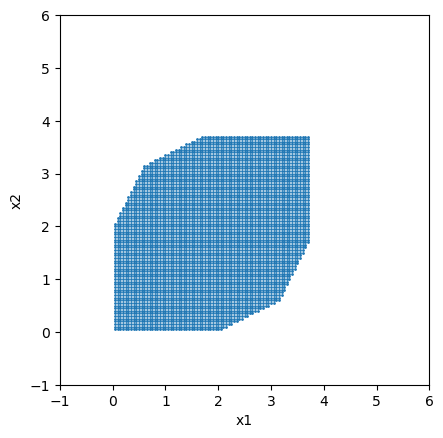

In [2]:
xx1, xx2 = [], []

# plot the forbidden configurations
for x1 in np.arange(0, 6, 0.05):
    for x2 in np.arange(0, 6, 0.05):
        if (Low(x1) < x2 and x2 - L < Upp(x1)) or (Low(x2) < x1 and x1 - L < Upp(x2)):
            xx1.append(x1)
            xx2.append(x2)

plt.scatter(xx1, xx2, s=1);
plt.gca().set_aspect('equal');
plt.gca().set_xlabel('x1'); plt.gca().set_ylabel('x2');
ax = plt.gca()
ax.set_xlim([-1, 6]);
ax.set_ylim([-1, 6]);
plt.savefig('report/figures/config-3.pdf')